# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Równanie Różniczkowe zwyczajne (RZZ) - rozwiązanie numeryczne
$$
\frac{dy}{dt} = \lambda y(t) \space \text{
dla } y_0 = 1, \lambda = -1
$$


# Metoda jawna eulera
Metoda:
$$
y_{n-1} = y_n + \Delta t \times \lambda y(t_n)
$$

Daje przepis:
$$
y_{n+1} = y_n + \Delta t*\lambda*y_n
$$

Rozwiązanie dla $t = [0,5]$ z $\Delta = 0.01, 0.1, 1$

In [2]:
def euler_1(t:np.ndarray,delta:float, l:float = -1.0, y0:float = 1) -> np.ndarray:
    y_hat = np.zeros_like(t)
    y_hat[0] = y0

    for idx in range(1,len(t)):
        y_hat[idx] = y_hat[idx - 1] + delta*l*y_hat[idx - 1]

    return y_hat


## Rozwiązanie analityczne
$$
y(t) = e^{\lambda t}
$$

In [3]:
def true_solution(t:np.ndarray, l:float = -1.0) -> np.ndarray:
    y_hat = np.exp(l*t)

    return y_hat

## Obliczenia


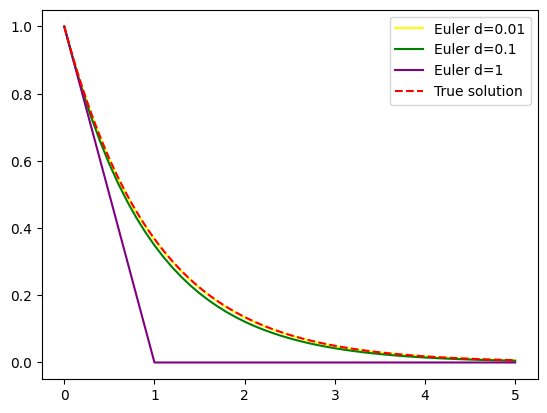

In [4]:
t_001 = np.arange(5.01, step=0.01)
t_01  = np.arange(5.1, step=0.1)
t_1   = np.arange(6.0, step=1.0)


y = true_solution(t_001)
y_e_001 = euler_1(t = t_001, delta=0.01)
y_e_01 = euler_1(t = t_01, delta=0.1)
y_e_1 = euler_1(t = t_1, delta=1)


plt.plot(t_001, y_e_001, color='yellow', label='Euler d=0.01')
plt.plot(t_01, y_e_01, color='green', label='Euler d=0.1')
plt.plot(t_1, y_e_1, color='purple', label='Euler d=1')
plt.plot(t_001, y, color='red', label='True solution' ,linestyle='--')
plt.legend()

plt.show()



# Bład Globalny

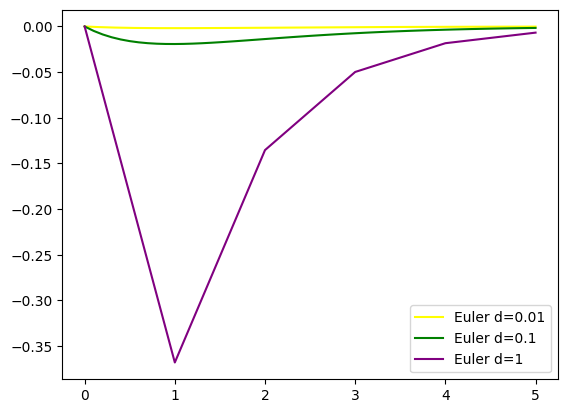

In [5]:
err_1 = y_e_1 - true_solution(t = t_1)
err_01 = y_e_01 - true_solution(t=t_01)
err_001 = y_e_001 - true_solution(t=t_001)


plt.plot(t_001, err_001, color='yellow', label='Euler d=0.01')
plt.plot(t_01, err_01, color='green', label='Euler d=0.1')
plt.plot(t_1, err_1, color='purple', label='Euler d=1')
plt.legend()
plt.show()



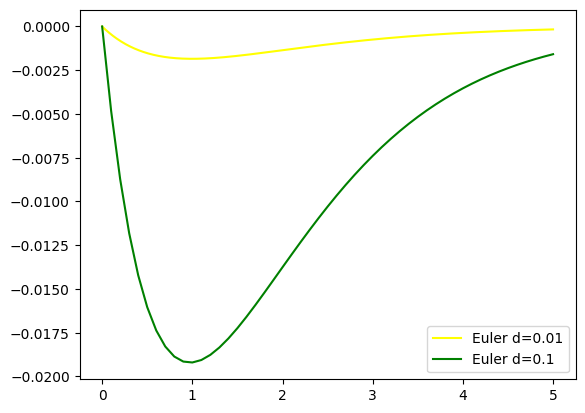

In [6]:
plt.plot(t_001, err_001, color='yellow', label='Euler d=0.01')
plt.plot(t_01, err_01, color='green', label='Euler d=0.1')
plt.legend()

plt.show()

# Metoda Trapezów
$k_1 = \lambda y_n$
$k_2 = \lambda (y_n + \Delta t k_1)$
$$
y_{n+1} = y_n + \frac{\Delta t}{2}(k_1 + k_2)
$$

In [7]:
def trapez(t:np.ndarray,delta:float, l:float = -1.0, y0:float = 1.0) -> np.ndarray:
    y_hat = np.zeros_like(t)
    y_hat[0] = y0

    for idx in range(1,len(t)):
        k1 = l*y_hat[idx-1]
        k2 = l*(y_hat[idx-1] + delta*k1)

        y_hat[idx] = float(y_hat[idx-1]) + float((delta/2.0)*(k1+k2))
    return y_hat


## Obliczenia

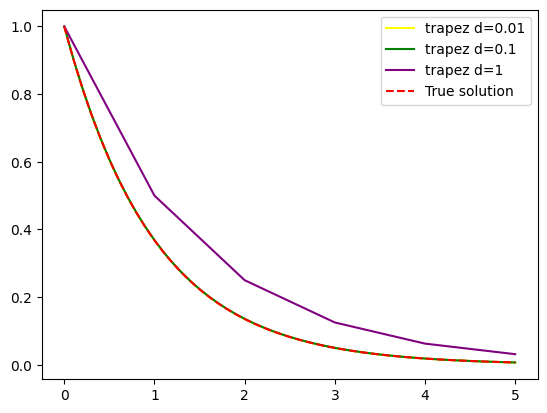

In [8]:
y_trap_001 = trapez(t_001, delta=0.01)
y_trap_01  = trapez(t_01, delta=0.1)
y_trap_1 = trapez(t_1, delta=1)

plt.plot(t_001, y_trap_001, color='yellow', label='trapez d=0.01')
plt.plot(t_01, y_trap_01, color='green', label='trapez d=0.1')
plt.plot(t_1, y_trap_1, color='purple', label='trapez d=1')
plt.plot(t_001, y, color='red', label='True solution' ,linestyle='--')

plt.legend()
plt.show()


## Błąd globalny

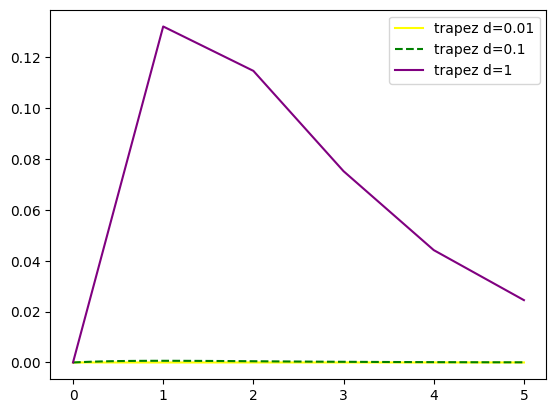

In [9]:
err_1 = y_trap_1 - true_solution(t = t_1)
err_01 = y_trap_01- true_solution(t=t_01)
err_001 = y_trap_001 - true_solution(t=t_001)

plt.plot(t_001, err_001, color='yellow', label='trapez d=0.01')
plt.plot(t_01, err_01, color='green', label='trapez d=0.1', linestyle='--')
plt.plot(t_1, err_1, color='purple', label='trapez d=1')
plt.legend()
plt.show()

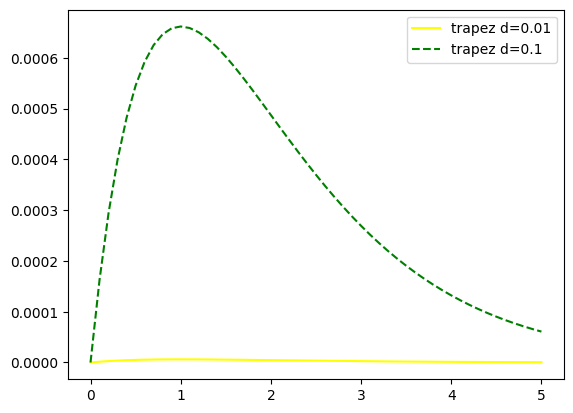

In [10]:
plt.plot(t_001, err_001, color='yellow', label='trapez d=0.01')
plt.plot(t_01, err_01, color='green', label='trapez d=0.1', linestyle='--')
plt.legend()
plt.show()

# Metoda RK4

In [11]:
def rk4(t:np.ndarray,delta:float, l:float = -1.0, y0:float = 1) -> np.ndarray:
    y_hat = np.zeros_like(t)
    y_hat[0] = y0

    for idx in range(1,len(t)):
        k1 = l*y_hat[idx-1]
        k2 = l*(y_hat[idx-1] + (delta/2)*k1)
        k3 = l*(y_hat[idx-1] + (delta/2)*k2)
        k4 = l*(y_hat[idx-1] + delta*k3)

        y_hat[idx] = y_hat[idx-1] + (delta/6)*(k1 + 2*k2 + 2*k3 + k4)

    return y_hat


## Obliczenia

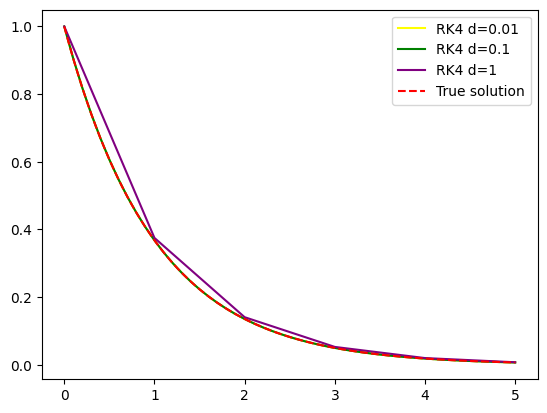

In [12]:
y_rk4_001 = rk4(t_001, delta=0.01)
y_rk4_01 = rk4(t_01, delta=0.1)
y_rk4_1 = rk4(t_1, delta=1)


plt.plot(t_001, y_rk4_001, color='yellow', label='RK4 d=0.01')
plt.plot(t_01, y_rk4_01, color='green', label='RK4 d=0.1')
plt.plot(t_1, y_rk4_1, color='purple', label='RK4 d=1')
plt.plot(t_001, y, color='red', label='True solution' ,linestyle='--')
plt.legend()

plt.show()

## Błąd globalny

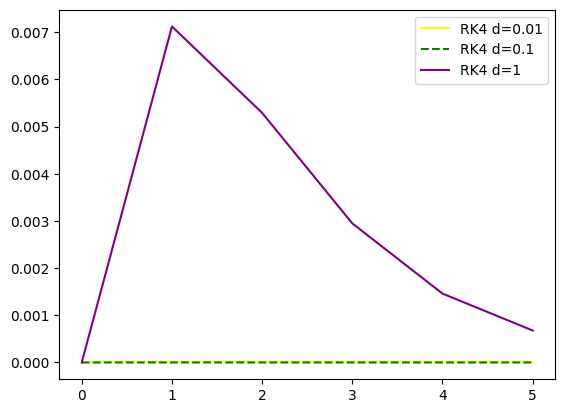

In [13]:
err_1 = y_rk4_1 - true_solution(t = t_1)
err_01 = y_rk4_01- true_solution(t=t_01)
err_001 = y_rk4_001 - true_solution(t=t_001)

plt.plot(t_001, err_001, color='yellow', label='RK4 d=0.01')
plt.plot(t_01, err_01, color='green', label='RK4 d=0.1', linestyle='--')
plt.plot(t_1, err_1, color='purple', label='RK4 d=1')
plt.legend()

plt.show()

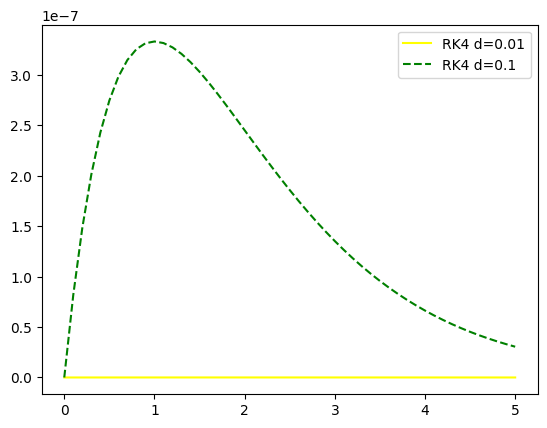

In [14]:
plt.plot(t_001, err_001, color='yellow', label='RK4 d=0.01')
plt.plot(t_01, err_01, color='green', label='RK4 d=0.1', linestyle='--')
plt.legend()

plt.show()